<a href="https://colab.research.google.com/github/Rupandrisingh25/Duplicate_Document/blob/main/duplicate_document.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all the libraries
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

#from scipy.misc import imread,imresize,imshow
import cv2
import time
from hashlib import md5
import scipy
import os
from matplotlib.pyplot import imread
import os
from PIL import Image
import shutil

# from scipy.misc import imread,imresize,imshow
get_ipython().system('pip install scipy')

In [ ]:
# prompt: import drive

from google.colab import drive

# Authenticate and create the PyDrive client.
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

def resize_image(image, max_width=400, max_height=400):
    image.thumbnail((max_width, max_height), Image.ANTIALIAS)
    return image

def save_image(image, output_folder, image_name):
    image_path = os.path.join(output_folder, image_name)
    image.save(image_path)

In [ ]:
def display_images_in_folders(root_folder, output_folder, max_width=400, max_height=400):
    for folder_name, _, filenames in os.walk(root_folder):
        for filename in filenames:
            file_path = os.path.join(folder_name, filename)
            if filename.lower().endswith(('.jpg', '.jpeg','png')):
                # Process JPEG images
                image = Image.open(file_path)
                image_name = f"{os.path.basename(folder_name)}_{filename}"
                resized_image = resize_image(image, max_width, max_height)
                save_image(resized_image, output_folder, image_name)
            elif filename.lower().endswith('.pdf'):
                # Process images from PDF files
                display_images_from_pdf(file_path, output_folder, max_width, max_height)

def display_images_from_pdf(pdf_path, output_folder, max_width=400, max_height=400):
    # Similar to your previous implementation
    pass

In [ ]:
# Root folder containing multiple folders with JPEG and PDF files
root_folder = '/content/drive/MyDrive/image2'

# Output folder to save resized images
output_folder = '/content/drive/MyDrive/image3'

# Maximum width and height for resized images
max_width = 200
max_height = 200

In [ ]:
# Create output folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Process and save images from the folders
display_images_in_folders(root_folder, output_folder, max_width, max_height)



<ipython-input-3-24363625c8c8>:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image.thumbnail((max_width, max_height), Image.ANTIALIAS)


In [ ]:
# get all the images from the new folder
image_dir=output_folder
os.chdir(image_dir)
os.getcwd()

'/content/drive/MyDrive/image3'

In [ ]:
# make a list of image paths and count the total number of images in the folder
image_files=os.listdir()
print(len(image_files))

30


In [ ]:
# check the image paths
image_files[0:10]

['CGW1445_Copy of Screenshot (17).png',
 'CGW1234_CGW1471_CGW1471_CGW1471_1_1.jpeg',
 'CGW1234_CGW178232_CGW178232_CGW178232_38_1.jpeg',
 'CGW1234_CGW178232_CGW178232_CGW178232_41_1.jpeg',
 'CGW1234_CGW178232_CGW178232_CGW178232_40_1.jpeg',
 'CGW1234_CGW178232_CGW178232_CGW178232_43_1.jpeg',
 'CGW1445_CGW1445_CGW1445_CGW1445_1_1.jpeg',
 'CGW1234_CGW178232_CGW178232_CGW178232_42_1.jpeg',
 'CGW1234_CGW178232_CGW178232_CGW178232_45_1.jpeg',
 'CGW1234_CGW178232_CGW178232_CGW178232_35_1.jpeg']

In [ ]:
# check the shape of the image , here we observer that the shape of the image is 3 Dimension
imread(image_files[550]).shape


IndexError: list index out of range

In [ ]:
import numpy as np
from skimage.io import imread

def filter_image(image_list):
    processed_images = []
    for image_path in image_list:
        try:
            img = imread(image_path)
            if len(img.shape) == 2:
                # Convert 2D image to 3D by adding a third dimension
                img = np.expand_dims(img, axis=2)
                img = np.tile(img, (1, 1, 3))  # Duplicate grayscale values to form RGB image
            processed_images.append(img)
        except Exception as e:
            print(f"Error processing image '{image_path}': {e}")
    return processed_images

In [ ]:

# convert image into grey scale
def img_gray(image):
    image=imread(image)
    return np.average(image,weights=[0.299,0.587,0.114],axis=2)

In [ ]:
# resize the image
def resize(image,height=30,width=30):
    row_res=cv2.resize(image,(height,width),interpolation=cv2.INTER_AREA).flatten()
    col_res=cv2.resize(image,(height,width),interpolation=cv2.INTER_AREA).flatten('F')
    return row_res,col_res

In [ ]:

#gradient direction based on intensity

def intensity_diff(row_res, col_res):
    difference_row = np.diff(row_res)
    difference_col = np.diff(col_res)
    difference_row = difference_row > 0
    difference_col = difference_col > 0
    return np.vstack((difference_row, difference_col)).flatten()
    #return difference_row
    #return np.vstack((difference_row, difference_col)) #str method

In [ ]:

def file_hash(array):
    return md5(array).hexdigest()


In [ ]:
def difference_score(image, height = 30, width = 30):
    gray = img_gray(image)
    row_res, col_res = resize(gray, height, width)
    difference = intensity_diff(row_res, col_res)

    return difference

In [ ]:
# Now make the function that store the hashing difference of different images
def difference_score_dict_hash(image_list):
    duplicates = []
    ds_dict = {}
    hash_ds = {}

    for idx, image in enumerate(image_list):
        try:
            # Convert the image array to a hashable string
            image_str = str(image.tolist())

            # Check if the image has been encountered before
            if image_str in hash_ds:
                duplicates.append((idx, hash_ds[image_str]))
            else:
                # If not, add the image string to the hash dictionary
                hash_ds[image_str] = idx

                # Compute some difference score for comparison if needed
                # For example, you can use some image comparison metric here

        except Exception as e:
            print(f"Error processing image at index {idx}: {e}")

    return duplicates, ds_dict, hash_ds

In [ ]:

#Now process the image files and call the difference hashing function
processed_images = filter_image(image_files)
duplicates, ds_dict, hash_ds = difference_score_dict_hash(processed_images)

In [ ]:
duplicates

[(17, 0), (22, 1), (29, 25)]

In [ ]:
duplicate_paths = [(image_files[idx1], image_files[idx2]) for idx1, idx2 in duplicates]


In [ ]:
# Now check the duplicate images path
len(duplicate_paths)

3

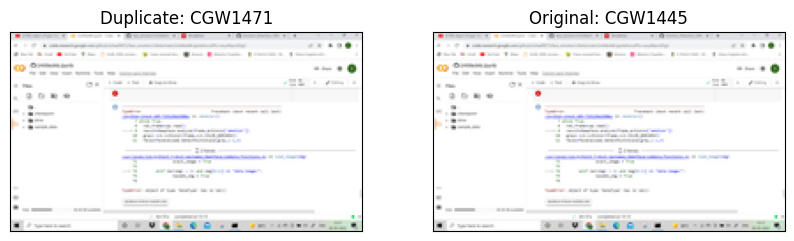

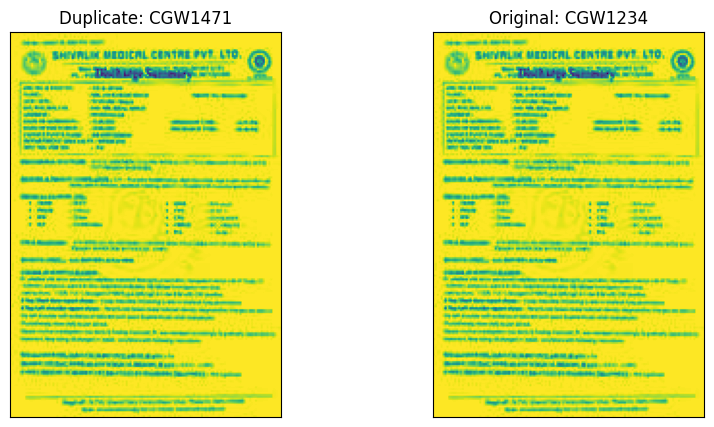

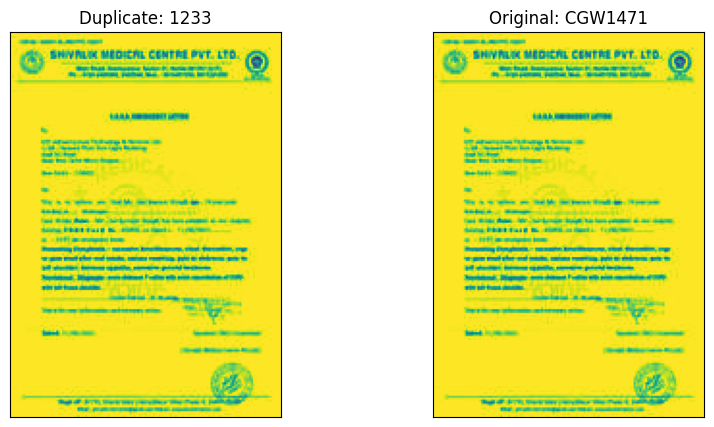

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread

for file_names in duplicate_paths:
    try:
        # Extract the portion of the filename before the first underscore
        file1_name = file_names[0].split('_')[0]
        file2_name = file_names[1].split('_')[0]

        # Check if the filenames are different
        if file1_name != file2_name:
            # Read the images
            image1 = imread(file_names[0])
            image2 = imread(file_names[1])

            # Display the images
            plt.figure(figsize=(10, 5))
            plt.subplot(121)
            plt.imshow(image1)
            plt.title(f'Duplicate: {file1_name}')
            plt.xticks([])
            plt.yticks([])

            plt.subplot(122)
            plt.imshow(image2)
            plt.title(f'Original: {file2_name}')
            plt.xticks([])
            plt.yticks([])

            plt.show()

    except OSError as e:
        continue


In [ ]:
duplicate_pairs = []

for file_names in duplicate_paths:
    try:
        # Extract the portion of the filename before the first underscore
        file1_name = file_names[0].split('_')[0]
        file2_name = file_names[1].split('_')[0]

        # Check if the filenames are different
        if file1_name != file2_name:
            # Append the file names to the list
            duplicate_pairs.append((file1_name, file2_name))

    except OSError as e:
        continue

In [ ]:
# Convert the list of file name pairs to a DataFrame
df_duplicate_pairs = pd.DataFrame(duplicate_pairs, columns=['Duplicate', 'Original'])

# Display the DataFrame
df_duplicate_pairs

In [ ]:
# Save the DataFrame to a CSV file with a custom path
df_duplicate_pairs.to_csv('E:\image\duplicate_pairs.csv', index=False)

In [ ]:
# you have a marksheet
# you to submit your marsheet in each year and some  more documnets also submmited by your side in each year
# is you teacher able to find out or memorize your previous year documnets